In [1]:
print("nimrita");



nimrita


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data = {
    "Hours_Studied": [1,2,3,4,5,6,7,8,9,10,
                      1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5],
    "Scores":        [30,35,40,45,50,55,60,65,70,75,
                      32,37,42,47,52,57,62,67,72]
}

df = pd.DataFrame(data)
df


,Hours_Studied,Scores
0,1.0,30
1,2.0,35
2,3.0,40
3,4.0,45
4,5.0,50
5,6.0,55
6,7.0,60
7,8.0,65
8,9.0,70
9,10.0,75


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  19 non-null     float64
 1   Scores         19 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 436.0 bytes


,Hours_Studied,Scores
count,19.000000,19.000000
mean,5.500000,52.263158
std,2.813657,14.070624
min,1.000000,30.000000
25%,3.250000,41.000000
50%,5.500000,52.000000
75%,7.750000,63.500000
max,10.000000,75.000000


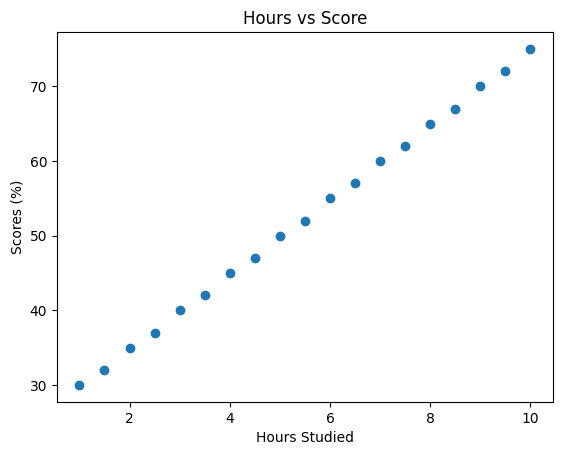

In [4]:
plt.scatter(df['Hours_Studied'], df['Scores'])
plt.xlabel("Hours Studied")
plt.ylabel("Scores (%)")
plt.title("Hours vs Score")
plt.show()


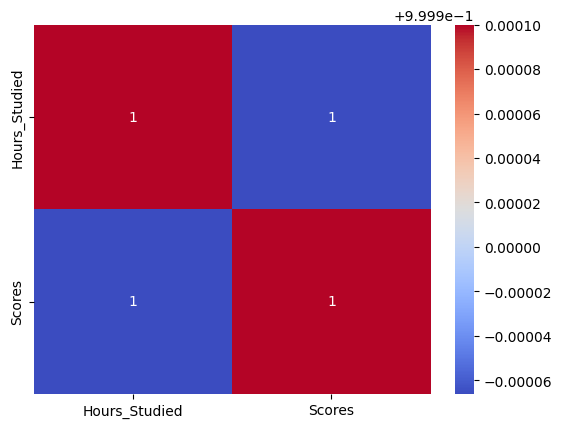

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [6]:
X = df[['Hours_Studied']]
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_test


(    Hours_Studied
 8             9.0
 16            7.5
 3             4.0
 13            4.5
 15            6.5
 17            8.5
 2             3.0
 9            10.0
 18            9.5
 4             5.0
 12            3.5
 7             8.0
 10            1.5
 14            5.5
 6             7.0,
     Hours_Studied
 0             1.0
 5             6.0
 11            2.5
 1             2.0)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [8]:
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (Coefficient): 5.013918629550321
Intercept: 24.647037830121345


In [9]:
y_pred = model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


,Actual,Predicted
0,30,29.660956
5,55,54.730550
11,37,37.181834
1,35,34.674875


In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.2788633119200554
MSE: 0.08158099859588316
RMSE: 0.2856238760956149
R² Score: 0.9990852866310203


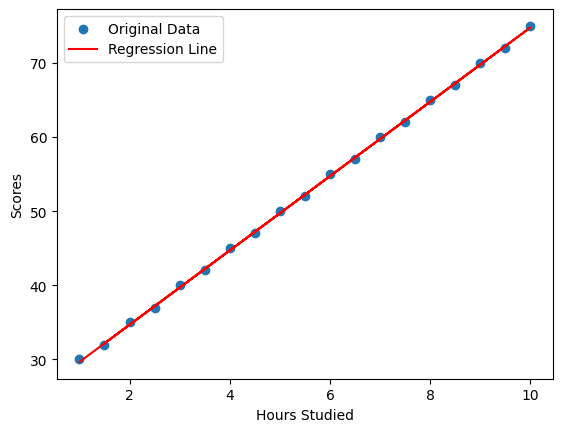

In [11]:
plt.scatter(X, y, label='Original Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.legend()
plt.show()


In [13]:
hours = float(input("Enter hours studied: "))
predicted_score = model.predict([[hours]])
print(f"Predicted Score: {predicted_score[0]:.2f}%")


Predicted Score: 74.79%


c:\Users\Noman Traders\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
